<a href="https://colab.research.google.com/github/Talizg03/weather/blob/main/2_2_25_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# running isolation forest and RandomForestRegressor on dataframe

In [2]:
import pandas as pd
df = pd.read_csv("Train.csv")

<ipython-input-9-261d0e6877ab>:9: DtypeWarning: Columns (13,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Train.csv")


Root Mean Squared Error (RMSE) on Train Data: 3465.907790109335
Root Mean Squared Error (RMSE) on Test Data: 9166.705086489732

Feature Importances (in %):
                     Feature  Importance
14               ProductSize   30.310163
5                   YearMade   22.502744
0                    SalesID    9.261127
1                  MachineID    3.764585
8                   saledate    3.702487
38            Coupler_System    3.503058
2                    ModelID    3.502044
11           fiSecondaryDesc    3.459240
15        fiProductClassDesc    3.075969
16                     state    2.245342
9                fiModelDesc    2.183361
10               fiBaseModel    2.007730
4               auctioneerID    1.824796
20                 Enclosure    1.552904
6   MachineHoursCurrentMeter    1.351352
31                Hydraulics    1.265708
12             fiModelSeries    0.518331
13         fiModelDescriptor    0.435962
36                 Tire_Size    0.421088
48                Blade_

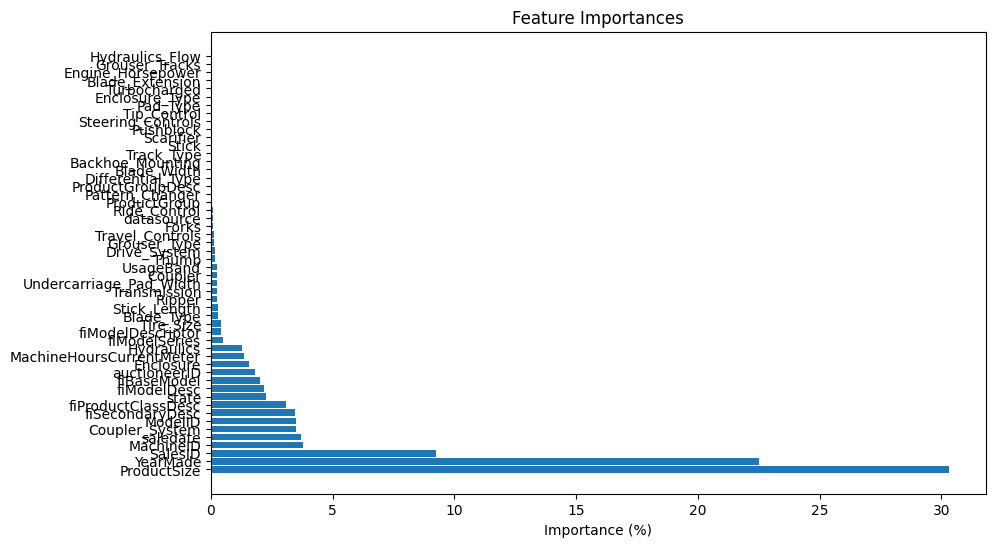

In [9]:
import pandas as pd
from sklearn.ensemble import IsolationForest, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np  # for sqrt function
import matplotlib.pyplot as plt  # for plotting

# Step 1: Upload the CSV file
df = pd.read_csv("Train.csv")



# Function to preprocess the data
def preprocess_data(X):
    # Convert categorical columns to category codes
    for col in X.columns:
        if X[col].dtype == 'object':  # If the column contains strings
            X[col] = X[col].astype('category')  # Convert to category type
        if X[col].dtype == 'category':  # If it's now a category dtype
            X[col] = X[col].cat.codes  # Convert category values to integer codes
    return X

# Step 2: Preprocessing (Assuming you have 'SalePrice' as the dependent variable)
# Split data into features (X) and target (y)
X = df.drop(columns=['SalePrice'] )  # Adjust the columns to drop based on your dataset
y = df['SalePrice']

# Preprocess the features to convert categorical columns into numeric codes
X = preprocess_data(X)

# Step 3: Apply Isolation Forest to detect anomalies
iso_forest = IsolationForest(contamination=0.05, n_estimators=100, random_state=42)  # Adjust contamination parameter as needed
outliers = iso_forest.fit_predict(X)
outliers = outliers == -1  # Mark outliers as True

# Filter out the outliers from the dataset
X_filtered = X[~outliers]
y_filtered = y[~outliers]

# Step 4: Train a Random Forest Regressor
# Split the filtered data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42)

# Initialize and fit the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Step 5: Make predictions
y_pred_train = rf_regressor.predict(X_train)
y_pred_test = rf_regressor.predict(X_test)

# Step 6: Calculate RMSE for Train and Test
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))  # RMSE for training data
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))      # RMSE for test data

print(f'Root Mean Squared Error (RMSE) on Train Data: {rmse_train}')
print(f'Root Mean Squared Error (RMSE) on Test Data: {rmse_test}')

# Step 7: Get feature importances
importances = rf_regressor.feature_importances_

# Convert importances to percentages
importances_percentage = importances * 100

# Step 8: Create a DataFrame for easy viewing
features = X.columns
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances_percentage
})

# Sort the DataFrame by importance (descending order)
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances as a table with percentages
print("\nFeature Importances (in %):")
print(importance_df)

# Optional: You can also plot the feature importances as a bar chart
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], align='center')
plt.xlabel("Importance (%)")
plt.title("Feature Importances")
plt.show()


# Delete 21-52 col according to the feature importance:

<ipython-input-11-781fa330fca7>:10: DtypeWarning: Columns (13,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Train.csv")


Root Mean Squared Error (RMSE) on Train Data: 3547.9676170253656
Root Mean Squared Error (RMSE) on Test Data: 9475.836625517117

Feature Importances (in %):
                     Feature  Importance
5                   YearMade   23.855873
14               ProductSize   22.580857
0                    SalesID    9.066437
10               fiBaseModel    8.792996
11           fiSecondaryDesc    7.572043
15        fiProductClassDesc    5.476704
8                   saledate    4.185540
1                  MachineID    4.058494
2                    ModelID    3.845713
9                fiModelDesc    2.703016
16                     state    2.499697
4               auctioneerID    1.973845
6   MachineHoursCurrentMeter    1.298692
12             fiModelSeries    0.570932
13         fiModelDescriptor    0.528432
17              ProductGroup    0.257285
18          ProductGroupDesc    0.240742
7                  UsageBand    0.227821
19              Drive_System    0.163102
3                 datas

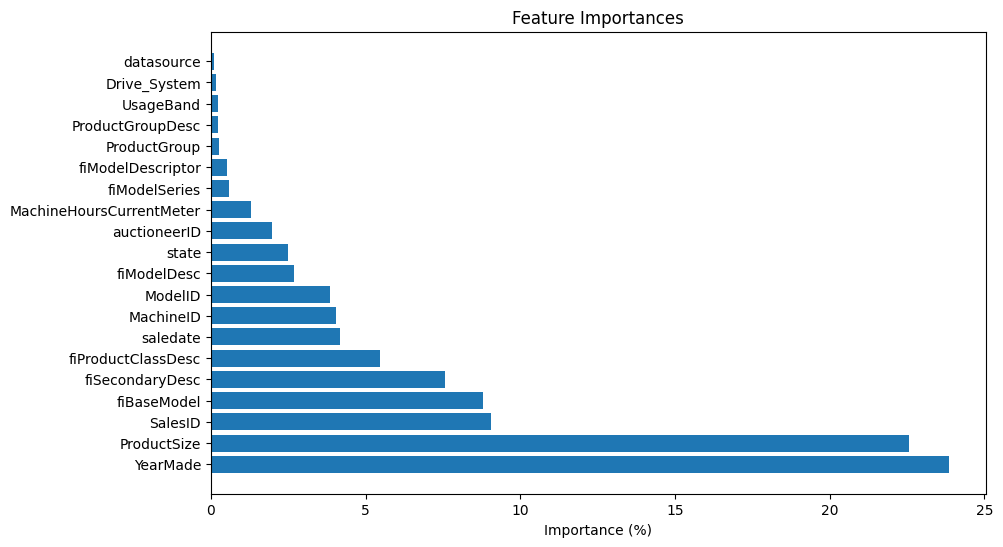

In [11]:
import pandas as pd
import seaborn as sns
from sklearn.ensemble import IsolationForest, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np  # for sqrt function
import matplotlib.pyplot as plt  # for plotting

# Step 1: Upload the CSV file
df = pd.read_csv("Train.csv")



# Function to preprocess the data
def preprocess_data(X):
    # Convert categorical columns to category codes
    for col in X.columns:
        if X[col].dtype == 'object':  # If the column contains strings
            X[col] = X[col].astype('category')  # Convert to category type
        if X[col].dtype == 'category':  # If it's now a category dtype
            X[col] = X[col].cat.codes  # Convert category values to integer codes
    return X


# Drop the selected columns (including 'SalePrice')
X = df.drop(columns=['SalePrice'] + list(df.columns[21:53]))
y = df['SalePrice']
# Preprocess the features to convert categorical columns into numeric codes
X = preprocess_data(X)

# Step 3: Apply Isolation Forest to detect anomalies
iso_forest = IsolationForest(contamination=0.05, n_estimators=100, random_state=42)  # Adjust contamination parameter as needed
outliers = iso_forest.fit_predict(X)
outliers = outliers == -1  # Mark outliers as True

# Filter out the outliers from the dataset
X_filtered = X[~outliers]
y_filtered = y[~outliers]

# Step 4: Train a Random Forest Regressor
# Split the filtered data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42)

# Initialize and fit the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Step 5: Make predictions
y_pred_train = rf_regressor.predict(X_train)
y_pred_test = rf_regressor.predict(X_test)

# Step 6: Calculate RMSE for Train and Test
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))  # RMSE for training data
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))      # RMSE for test data

print(f'Root Mean Squared Error (RMSE) on Train Data: {rmse_train}')
print(f'Root Mean Squared Error (RMSE) on Test Data: {rmse_test}')

# Step 7: Get feature importances
importances = rf_regressor.feature_importances_

# Convert importances to percentages
importances_percentage = importances * 100

# Step 8: Create a DataFrame for easy viewing
features = X.columns
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances_percentage
})

# Sort the DataFrame by importance (descending order)
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances as a table with percentages
print("\nFeature Importances (in %):")
print(importance_df)

# Optional: You can also plot the feature importances as a bar chart
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], align='center')
plt.xlabel("Importance (%)")
plt.title("Feature Importances")
plt.show()




# same code-change test to test_size=0.3

<ipython-input-12-58fc0d751116>:10: DtypeWarning: Columns (13,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Train.csv")


Root Mean Squared Error (RMSE) on Train Data: 3587.77611348293
Root Mean Squared Error (RMSE) on Test Data: 9606.730230265739

Feature Importances (in %):
                     Feature  Importance
5                   YearMade   23.914990
14               ProductSize   22.582014
0                    SalesID    8.978545
10               fiBaseModel    8.849003
11           fiSecondaryDesc    7.604959
15        fiProductClassDesc    5.448633
8                   saledate    4.162118
1                  MachineID    4.082564
2                    ModelID    3.922579
9                fiModelDesc    2.641553
16                     state    2.509088
4               auctioneerID    1.938981
6   MachineHoursCurrentMeter    1.315293
12             fiModelSeries    0.555141
13         fiModelDescriptor    0.536035
18          ProductGroupDesc    0.239532
7                  UsageBand    0.232533
17              ProductGroup    0.215911
19              Drive_System    0.160817
3                 datasou

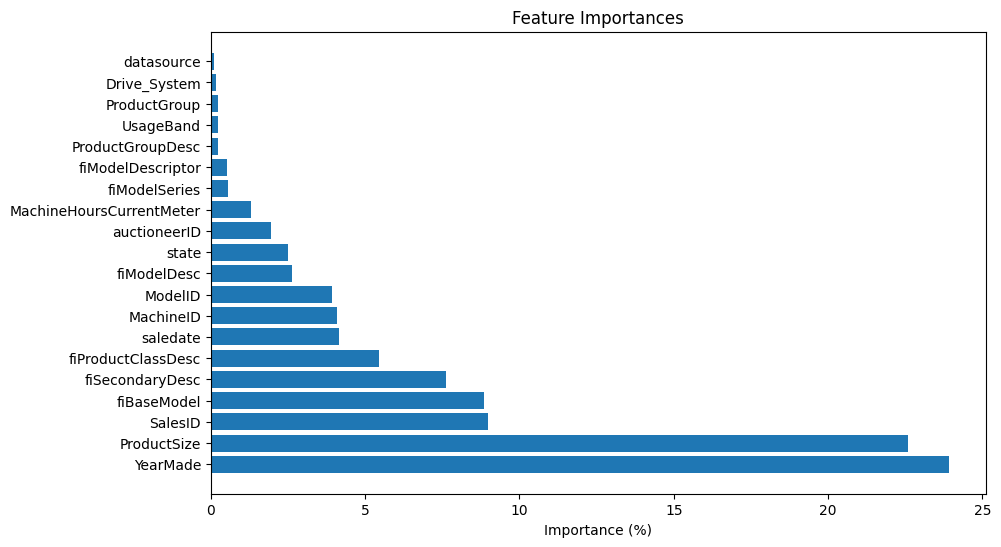

In [12]:
import pandas as pd
import seaborn as sns
from sklearn.ensemble import IsolationForest, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np  # for sqrt function
import matplotlib.pyplot as plt  # for plotting

# Step 1: Upload the CSV file
df = pd.read_csv("Train.csv")



# Function to preprocess the data
def preprocess_data(X):
    # Convert categorical columns to category codes
    for col in X.columns:
        if X[col].dtype == 'object':  # If the column contains strings
            X[col] = X[col].astype('category')  # Convert to category type
        if X[col].dtype == 'category':  # If it's now a category dtype
            X[col] = X[col].cat.codes  # Convert category values to integer codes
    return X


# Drop the selected columns (including 'SalePrice')
X = df.drop(columns=['SalePrice'] + list(df.columns[21:53]))
y = df['SalePrice']
# Preprocess the features to convert categorical columns into numeric codes
X = preprocess_data(X)

# Step 3: Apply Isolation Forest to detect anomalies
iso_forest = IsolationForest(contamination=0.05, n_estimators=100, random_state=42)  # Adjust contamination parameter as needed
outliers = iso_forest.fit_predict(X)
outliers = outliers == -1  # Mark outliers as True

# Filter out the outliers from the dataset
X_filtered = X[~outliers]
y_filtered = y[~outliers]

# Step 4: Train a Random Forest Regressor
# Split the filtered data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.3, random_state=42)

# Initialize and fit the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Step 5: Make predictions
y_pred_train = rf_regressor.predict(X_train)
y_pred_test = rf_regressor.predict(X_test)

# Step 6: Calculate RMSE for Train and Test
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))  # RMSE for training data
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))      # RMSE for test data

print(f'Root Mean Squared Error (RMSE) on Train Data: {rmse_train}')
print(f'Root Mean Squared Error (RMSE) on Test Data: {rmse_test}')

# Step 7: Get feature importances
importances = rf_regressor.feature_importances_

# Convert importances to percentages
importances_percentage = importances * 100

# Step 8: Create a DataFrame for easy viewing
features = X.columns
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances_percentage
})

# Sort the DataFrame by importance (descending order)
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances as a table with percentages
print("\nFeature Importances (in %):")
print(importance_df)

# Optional: You can also plot the feature importances as a bar chart
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], align='center')
plt.xlabel("Importance (%)")
plt.title("Feature Importances")
plt.show()




# adding Key Hyperparameters to RandomForestRegressor

<ipython-input-5-894f397640a5>:9: DtypeWarning: Columns (13,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Train.csv")


Root Mean Squared Error (RMSE) on Train Data: 11146.234415619689
Root Mean Squared Error (RMSE) on Test Data: 11363.306833367846

Feature Importances (in %):
                     Feature  Importance
5                   YearMade   30.051958
14               ProductSize   29.940428
10               fiBaseModel   10.893575
11           fiSecondaryDesc    8.963697
15        fiProductClassDesc    6.146624
0                    SalesID    5.882087
2                    ModelID    3.272223
9                fiModelDesc    1.985127
1                  MachineID    0.741807
6   MachineHoursCurrentMeter    0.465019
12             fiModelSeries    0.433990
13         fiModelDescriptor    0.374812
4               auctioneerID    0.178803
17              ProductGroup    0.162603
18          ProductGroupDesc    0.160565
8                   saledate    0.132379
19              Drive_System    0.090381
16                     state    0.090118
3                 datasource    0.024730
7                  Usa

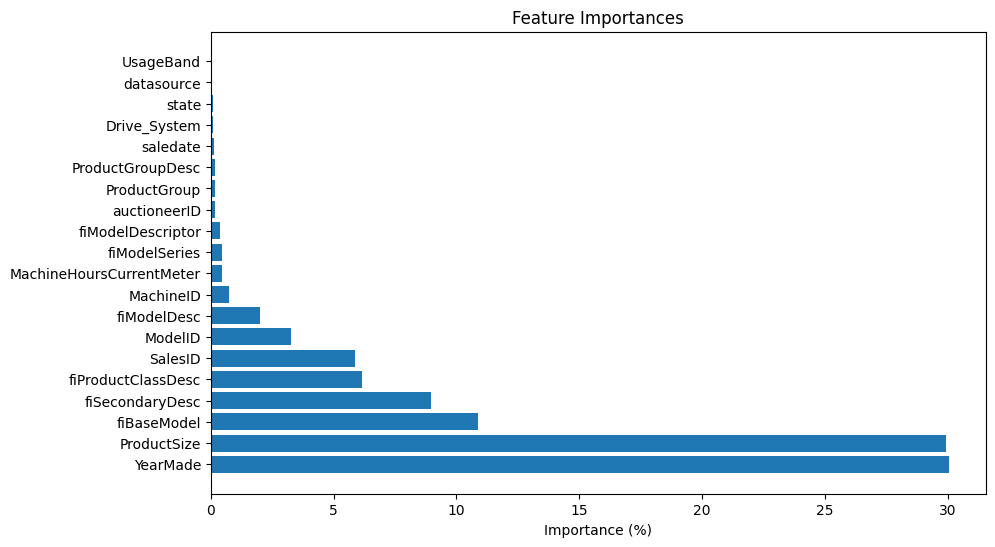

In [ ]:
import pandas as pd
from sklearn.ensemble import IsolationForest, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np  # for sqrt function
import matplotlib.pyplot as plt  # for plotting

# Step 1: Upload the CSV file
df = pd.read_csv("Train.csv")



# Function to preprocess the data
def preprocess_data(X):
    # Convert categorical columns to category codes
    for col in X.columns:
        if X[col].dtype == 'object':  # If the column contains strings
            X[col] = X[col].astype('category')  # Convert to category type
        if X[col].dtype == 'category':  # If it's now a category dtype
            X[col] = X[col].cat.codes  # Convert category values to integer codes
    return X

# Step 2: Preprocessing (Assuming you have 'SalePrice' as the dependent variable)
# Split data into features (X) and target (y)

X2 = df.drop(columns=['SalePrice'] + list(df.columns[21:53]))  # Adjust the columns to drop based on your dataset
y2 = df['SalePrice']

# Preprocess the features to convert categorical columns into numeric codes
X2 = preprocess_data(X2)

# Step 3: Apply Isolation Forest to detect anomalies
iso_forest = IsolationForest(contamination=0.05, n_estimators=100, random_state=42)  # Adjust contamination parameter as needed
outliers = iso_forest.fit_predict(X2)
outliers = outliers == -1  # Mark outliers as True

# Filter out the outliers from the dataset
X2_filtered = X2[~outliers]
y2_filtered = y2[~outliers]

# Step 4: Train a Random Forest Regressor
# Split the filtered data into train and test sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2_filtered, y2_filtered, test_size=0.2, random_state=42)

# Initialize and fit the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1, max_depth=10, min_samples_split=5,min_samples_leaf=4)
rf_regressor.fit(X2_train, y2_train)

# Step 5: Make predictions
y2_pred_train = rf_regressor.predict(X2_train)
y2_pred_test = rf_regressor.predict(X2_test)

# Step 6: Calculate RMSE for Train and Test
rmse_train = np.sqrt(mean_squared_error(y2_train, y2_pred_train))  # RMSE for training data
rmse_test = np.sqrt(mean_squared_error(y2_test, y2_pred_test))      # RMSE for test data

print(f'Root Mean Squared Error (RMSE) on Train Data: {rmse_train}')
print(f'Root Mean Squared Error (RMSE) on Test Data: {rmse_test}')

# Step 7: Get feature importances
importances = rf_regressor.feature_importances_

# Convert importances to percentages
importances_percentage = importances * 100

# Step 8: Create a DataFrame for easy viewing
features = X2.columns
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances_percentage
})

# Sort the DataFrame by importance (descending order)
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances as a table with percentages
print("\nFeature Importances (in %):")
print(importance_df)

# Optional: You can also plot the feature importances as a bar chart
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], align='center')
plt.xlabel("Importance (%)")
plt.title("Feature Importances")
plt.show()






The Root Mean Squared Error (RMSE) values you're seeing indicate how well your model is performing on the training data versus the test data.

RMSE on Train Data: 11146.23: This represents how well the model fits the data it was trained on. Lower values are better because they indicate less error between the actual and predicted values.
RMSE on Test Data: 11363.31: This represents the error between the actual and predicted values for unseen (test) data. It gives an indication of how well the model generalizes to new data.
Analysis:
**Close RMSE values**: The fact that your RMSE values are close to each other on the train and test sets is generally a good sign. It suggests that your model is not overfitting or underfitting.

Overfitting would occur if the model performs significantly better on the training data than on the test data (i.e., the train RMSE is much lower than the test RMSE).
Underfitting would happen if both train and test RMSE are high and close to each other, indicating that the model is too simple to capture the patterns in the data.
**The RMSE values themselves: Whether these RMSE values are "good" or "bad" depends on the scale of your target variable, SalePrice in this case.**

If the target values (SalePrice) are in a large range (e.g., from $50,000 to $1,000,000), an RMSE of ~11,000 could be acceptable.
If SalePrice values are smaller, this RMSE might be relatively high, and you may need to improve the model. **bold text**
Possible Next Steps:
Hyperparameter Tuning: You can improve the performance by adjusting hyperparameters (like n_estimators, max_depth, min_samples_split, etc.) using GridSearchCV or RandomizedSearchCV.
Feature Engineering: Investigate if there are any features that could be added, transformed, or removed to improve performance. Feature scaling or handling categorical variables better could help.
Try Different Models: Experiment with other machine learning models like XGBoost, LightGBM, or Gradient Boosting, which often perform better for structured data.
Cross-validation: Use cross-validation to get a more reliable estimate of model performance.

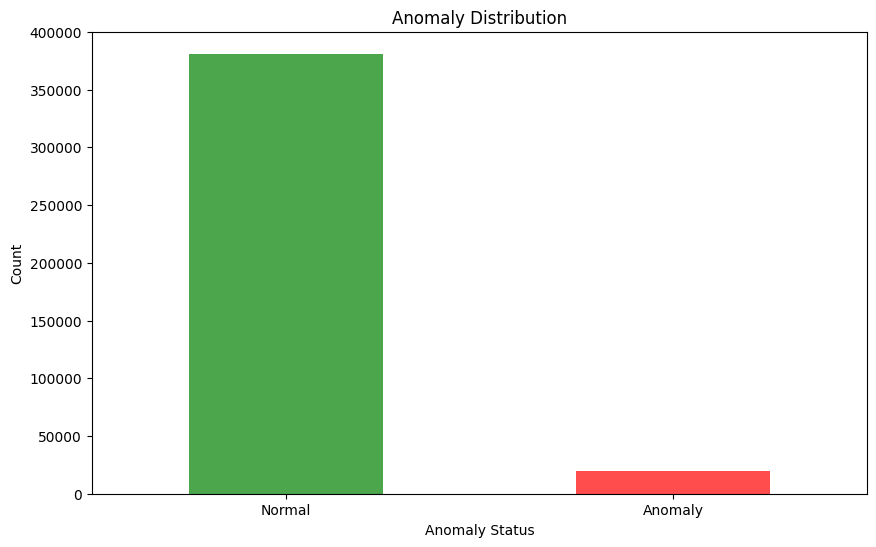

In [ ]:
# Add anomaly score and label to the dataframe
df['anomaly_score'] = iso_forest.decision_function(X)  # Quantitative weirdness
df['anomaly'] = iso_forest.predict(X)  # Binary anomaly label
df['anomaly_label'] = df['anomaly'].map({1: 'Normal', -1: 'Anomaly'})

# Step 9: Plot anomaly distribution
plt.figure(figsize=(10, 6))
df['anomaly'].value_counts().plot(kind='bar', color=['green', 'red'], alpha=0.7)
plt.title("Anomaly Distribution")
plt.xlabel("Anomaly Status")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=['Normal', 'Anomaly'], rotation=0)
plt.show()

In [ ]:
df.anomaly.value_counts()

,count
anomaly,
1,381068
-1,20057


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

model = RandomForestRegressor()
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

print("Test RMSE:", mean_squared_error(y_test, y_test_pred) ** 0.5)
print("Train RMSE:", mean_squared_error(y_train, y_pred_train) ** 0.5)






Test RMSE: 9489.155558578685
Train RMSE: 3546.105002383466


NOT GOOD to lower the  Hyperparameterskeys in   RandomForestRegressor - it raise the RMSE of both Train and Test

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

model = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1, max_depth=2, min_samples_split=2,min_samples_leaf=2) #notgood
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

print("Test RMSE:", mean_squared_error(y_test, y_test_pred) ** 0.5)
print("Train RMSE:", mean_squared_error(y_train, y_pred_train) ** 0.5)


Test RMSE: 19499.987000024328
Train RMSE: 19449.688052032998


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

model = RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1, max_depth=50, min_samples_split=50,min_samples_leaf=50)
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

print("Test RMSE:", mean_squared_error(y_test, y_test_pred) ** 0.5)
print("Train RMSE:", mean_squared_error(y_train, y_pred_train) ** 0.5)


Test RMSE: 10447.75984706979
Train RMSE: 10054.158916077278


# Adding new col: AgeOfVehicle = saledate-YearMade

In [3]:
df2=df.copy()
df2.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000,999089,3157,121,3,2004,68,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000,117657,77,121,3,1996,4640,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000,434808,7009,121,3,2001,2838,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500,1026470,332,121,3,2001,3486,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000,1057373,17311,121,3,2007,722,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Convert 'date_of_sale' to datetime format
df2['date_of_sale'] = pd.to_datetime(df2['saledate'], format='%m/%d/%Y %H:%M', errors='coerce')

# Add AgeOfVehicle column (date of sale year - YearMade)
df2['AgeOfVehicle'] = df2['date_of_sale'].dt.year - df2['YearMade']

# Display the first few rows of the updated DataFrame
print(df2[['date_of_sale', 'YearMade', 'AgeOfVehicle']].head())
df2.head()

  date_of_sale  YearMade  AgeOfVehicle
0   2006-11-16      2004             2
1   2004-03-26      1996             8
2   2004-02-26      2001             3
3   2011-05-19      2001            10
4   2009-07-23      2007             2


,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,date_of_sale,AgeOfVehicle
0,1139246,66000,999089,3157,121,3,2004,68,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,2006-11-16,2
1,1139248,57000,117657,77,121,3,1996,4640,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,2004-03-26,8
2,1139249,10000,434808,7009,121,3,2001,2838,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004-02-26,3
3,1139251,38500,1026470,332,121,3,2001,3486,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-05-19,10
4,1139253,11000,1057373,17311,121,3,2007,722,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009-07-23,2


In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181355 entries, 0 to 181354
Data columns (total 55 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   181355 non-null  int64         
 1   SalePrice                 181355 non-null  int64         
 2   MachineID                 181355 non-null  int64         
 3   ModelID                   181355 non-null  int64         
 4   datasource                181355 non-null  int64         
 5   auctioneerID              181355 non-null  int64         
 6   YearMade                  181355 non-null  int64         
 7   MachineHoursCurrentMeter  29572 non-null   float64       
 8   UsageBand                 26646 non-null   object        
 9   saledate                  181355 non-null  object        
 10  fiModelDesc               181355 non-null  object        
 11  fiBaseModel               181355 non-null  object        
 12  fi

# adding new col - Age of vehicle

In [6]:
import seaborn as sns
import pandas as pd

from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
import pandas as pd

# Load dataset
data = df2
X, y = data.drop(columns=['SalePrice','date_of_sale']), data['SalePrice']
feature_names = X.columns

def train_model(X, y):
    for col in X.columns:
        if X[col].dtype == 'object':
            X[col] = X[col].astype('category')

        if X[col].dtype == 'category':
            X[col] = X[col].cat.codes

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the Random Forest model
    rf = RandomForestRegressor(random_state=42, n_jobs=-1)
    rf.fit(X_train, y_train)

    # Evaluate model performance using RMSE
    from sklearn.metrics import mean_squared_error
    y_pred = rf.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred) ** 0.5
    y_train_pred = rf.predict(X_train)
    train_rmse = mean_squared_error(y_train, y_train_pred) ** 0.5
    print(f"Train: Root Mean Squared Error (RMSE): {train_rmse}")
    print(f"Test: Root Mean Squared Error (RMSE): {rmse}")
    return rf, (X_train, X_test, y_train, y_test)

rf, xs = train_model(X, y)

Train: Root Mean Squared Error (RMSE): 2783.610995696436
Test: Root Mean Squared Error (RMSE): 7285.65432797839


In [13]:
df3=df2.drop(columns=['date_of_sale','saledate' ]+list(df.columns[21:53])).copy()
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181355 entries, 0 to 181354
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   181355 non-null  int64  
 1   SalePrice                 181355 non-null  int64  
 2   MachineID                 181355 non-null  int64  
 3   ModelID                   181355 non-null  int64  
 4   datasource                181355 non-null  int64  
 5   auctioneerID              181355 non-null  int64  
 6   YearMade                  181355 non-null  int64  
 7   MachineHoursCurrentMeter  29572 non-null   float64
 8   UsageBand                 26646 non-null   object 
 9   fiModelDesc               181355 non-null  object 
 10  fiBaseModel               181355 non-null  object 
 11  fiSecondaryDesc           130041 non-null  object 
 12  fiModelSeries             13806 non-null   object 
 13  fiModelDescriptor         31210 non-null   o

# delete 21-52 col did not improve the RMSE - stay with the previous code

In [14]:
import seaborn as sns
import pandas as pd

from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
import pandas as pd

# Load dataset
data = df3
X, y = data.drop(columns=['SalePrice']), data['SalePrice']
feature_names = X.columns

def train_model(X, y):
    for col in X.columns:
        if X[col].dtype == 'object':
            X[col] = X[col].astype('category')

        if X[col].dtype == 'category':
            X[col] = X[col].cat.codes

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the Random Forest model
    rf = RandomForestRegressor(random_state=42, n_jobs=-1)
    rf.fit(X_train, y_train)

    # Evaluate model performance using RMSE
    from sklearn.metrics import mean_squared_error
    y_pred = rf.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred) ** 0.5
    y_train_pred = rf.predict(X_train)
    train_rmse = mean_squared_error(y_train, y_train_pred) ** 0.5
    print(f"Train: Root Mean Squared Error (RMSE): {train_rmse}")
    print(f"Test: Root Mean Squared Error (RMSE): {rmse}")
    return rf, (X_train, X_test, y_train, y_test)

rf, xs = train_model(X, y)

Train: Root Mean Squared Error (RMSE): 2889.7969620348995
Test: Root Mean Squared Error (RMSE): 7598.524276086749


In [5]:
df4=df2.drop(columns=['date_of_sale','saledate' ]).copy()
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21269 entries, 0 to 21268
Data columns (total 53 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   SalesID                   21269 non-null  int64 
 1   SalePrice                 21269 non-null  int64 
 2   MachineID                 21269 non-null  int64 
 3   ModelID                   21269 non-null  int64 
 4   datasource                21269 non-null  int64 
 5   auctioneerID              21269 non-null  int64 
 6   YearMade                  21269 non-null  int64 
 7   MachineHoursCurrentMeter  21269 non-null  int64 
 8   UsageBand                 18672 non-null  object
 9   fiModelDesc               21269 non-null  object
 10  fiBaseModel               21269 non-null  object
 11  fiSecondaryDesc           14144 non-null  object
 12  fiModelSeries             3431 non-null   object
 13  fiModelDescriptor         5403 non-null   object
 14  ProductSize           

# Adding new col:Specification=Transmission+Engine_Horsepower

In [8]:
df4['Specifications']=df2['Transmission']+df2['Engine_Horsepower']
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21269 entries, 0 to 21268
Data columns (total 54 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   SalesID                   21269 non-null  int64 
 1   SalePrice                 21269 non-null  int64 
 2   MachineID                 21269 non-null  int64 
 3   ModelID                   21269 non-null  int64 
 4   datasource                21269 non-null  int64 
 5   auctioneerID              21269 non-null  int64 
 6   YearMade                  21269 non-null  int64 
 7   MachineHoursCurrentMeter  21269 non-null  int64 
 8   UsageBand                 18672 non-null  object
 9   fiModelDesc               21269 non-null  object
 10  fiBaseModel               21269 non-null  object
 11  fiSecondaryDesc           14144 non-null  object
 12  fiModelSeries             3431 non-null   object
 13  fiModelDescriptor         5403 non-null   object
 14  ProductSize           

In [9]:
df5=df4.copy()
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21269 entries, 0 to 21268
Data columns (total 54 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   SalesID                   21269 non-null  int64 
 1   SalePrice                 21269 non-null  int64 
 2   MachineID                 21269 non-null  int64 
 3   ModelID                   21269 non-null  int64 
 4   datasource                21269 non-null  int64 
 5   auctioneerID              21269 non-null  int64 
 6   YearMade                  21269 non-null  int64 
 7   MachineHoursCurrentMeter  21269 non-null  int64 
 8   UsageBand                 18672 non-null  object
 9   fiModelDesc               21269 non-null  object
 10  fiBaseModel               21269 non-null  object
 11  fiSecondaryDesc           14144 non-null  object
 12  fiModelSeries             3431 non-null   object
 13  fiModelDescriptor         5403 non-null   object
 14  ProductSize           

# the RMSE increase with the addition of new col- Specifications

In [11]:
import seaborn as sns
import pandas as pd

from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
import pandas as pd

# Load dataset
data = df5
X, y = data.drop(columns=['SalePrice','Engine_Horsepower','Transmission']), data['SalePrice']
feature_names = X.columns

def train_model(X, y):
    for col in X.columns:
        if X[col].dtype == 'object':
            X[col] = X[col].astype('category')

        if X[col].dtype == 'category':
            X[col] = X[col].cat.codes

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the Random Forest model
    rf = RandomForestRegressor(random_state=42, n_jobs=-1)
    rf.fit(X_train, y_train)

    # Evaluate model performance using RMSE
    from sklearn.metrics import mean_squared_error
    y_pred = rf.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred) ** 0.5
    y_train_pred = rf.predict(X_train)
    train_rmse = mean_squared_error(y_train, y_train_pred) ** 0.5
    print(f"Train: Root Mean Squared Error (RMSE): {train_rmse}")
    print(f"Test: Root Mean Squared Error (RMSE): {rmse}")
    return rf, (X_train, X_test, y_train, y_test)

rf, xs = train_model(X, y)

Train: Root Mean Squared Error (RMSE): 3237.735690725867
Test: Root Mean Squared Error (RMSE): 8331.70040068733
